In [1]:
import numpy as np
import matplotlib.pyplot as plt
import networkx as net
from sklearn.utils.extmath import randomized_svd as svd
from sklearn.cluster import SpectralClustering as SC
from sklearn.mixture import GaussianMixture as Gauss
from sklearn.metrics import rand_score

In [2]:
def generate_B(proba_in, proba_cross, n_cluster):
    zero = np.zeros([n_cluster, n_cluster]) + proba_cross
    zero[range(n_cluster), range(n_cluster)] = proba_in
    return zero

In [3]:
def generate_normal_B(d, mean, var):
    variance = np.random.beta(mean, var,(d,d))
    for i in range(d):
        for j in range(i,d):
            variance[j][i] = variance[i][j]
    return variance

In [4]:
def spherical_transform(X): #X is our nxm embed-ment matrix, n MPs and latent dimension m
    (a,b) = X.shape
    X1 = np.zeros((a, b-1)) #creating the new matrix that will have the spherical latent coordinates
    for i in range(a): 
        if X[i, 0] >= 0:
            X1[i, 0] = np.arccos((X[i, 1]) / np.linalg.norm(X[i, :2]))
        else:
            X1[i, 0] = 2*np.pi - np.arccos((X[i, 1]) / np.linalg.norm(X[i, :2]))
        for j in range(1, b-1):
            X1[i, j] = 2*np.arccos((X[i, j+1]) / np.linalg.norm(X[i, :(j+2)]))
    return X1

In [5]:
a = np.array([1.2,0.1,0,0,0])
(a>=1)[1]

False

In [6]:
B = generate_B(0.5, 0.1, 13)

In [6]:
def gen_true_label(li):
    out = []
    index = 0
    for a in li:
        out += [index for n in range(a)]
        index+=1
    return out

In [61]:
party_size = [400,400,400,400,400]
len(party_size)
t_label = gen_true_label(party_size)

False

In [230]:
B = generate_B(0.5, 0.1, 5)
simul_graph = net.stochastic_block_model(party_size, B)

In [56]:
A = net.to_numpy_matrix(simul_graph)
U, S, Vh = svd(A, 2) # not sure 600 is a good number 
S = np.diag(S)
X = U@S

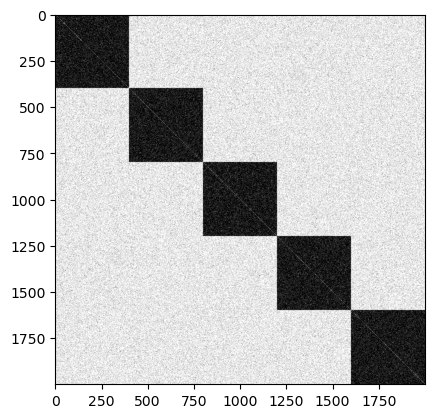

In [57]:
plt.imshow(A, cmap='binary')

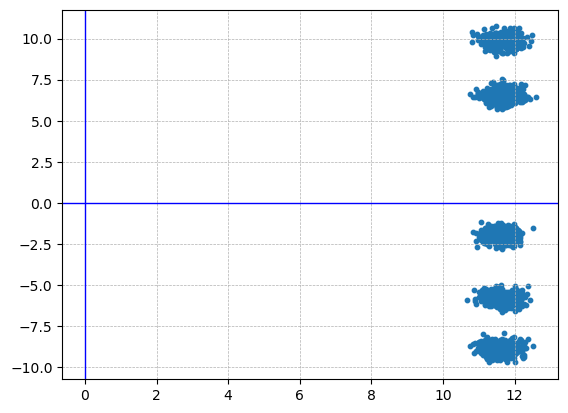

In [62]:
plt.scatter(X[:,0], X[:,1],s=10)
plt.axhline(0, color='blue', linewidth=1) 
plt.axvline(0, color='blue', linewidth=1)
plt.grid(True, linestyle='--', linewidth=0.5)

In [63]:
U, S, Vh = svd(A, 13) # not sure 600 is a good number 
S = np.diag(S)
X = U@S

In [67]:
result = SC(n_clusters=5, n_components=5).fit_predict(X)
print(rand_score(t_label,result))
result = Gauss(n_components=5).fit_predict(X)
print(rand_score(t_label,result))

1.0
1.0


0.7112265331664581
0.7114299123904881


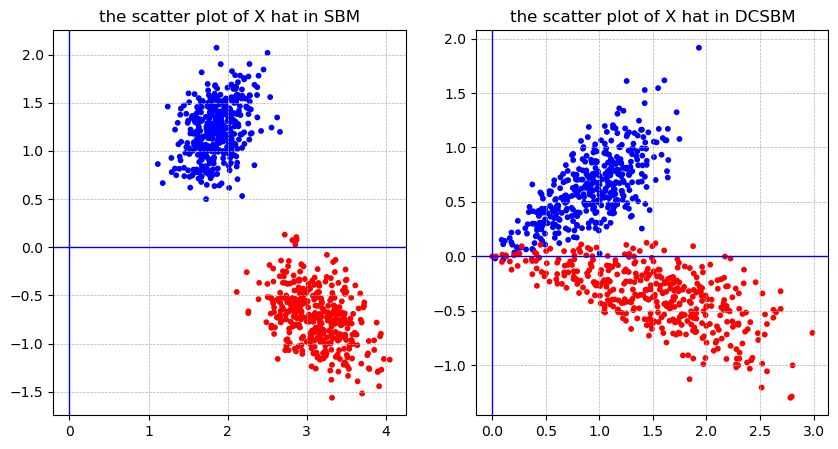

In [16]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))

B = np.array([[0.1, 0.05],[0.05, 0.15]])
party_size =[400,400]
simul_graph = net.stochastic_block_model(party_size, B)
t_label = gen_true_label([400,400])
A = net.to_numpy_matrix(simul_graph)
U, S, Vh = svd(A, 2) # not sure 600 is a good number 
S = np.diag(S)
X = U@S
color = ['blue', 'red']
colors = [color[l] for l in t_label]

ax1.scatter(X[:,0], X[:,1],s=10, c=colors)
ax1.axhline(0, color='blue', linewidth=1) 
ax1.axvline(0, color='blue', linewidth=1)
ax1.grid(True, linestyle='--', linewidth=0.5)
ax1.set_title('the scatter plot of X hat in SBM')
result = SC(n_clusters=5, n_components=5,random_state=100).fit_predict(X)
print(rand_score(t_label,result))
result = Gauss(n_components=5,random_state=100).fit_predict(X)
print(rand_score(t_label,result))

beta = np.random.beta(2,1, (1,800))[0] #500 nodes
labels = gen_true_label([400 for n in range(2)])
full = get_proba(B, beta, labels)
full.shape
dummy_label = [1 for n in range(len(beta))]
simul_graph = net.stochastic_block_model(dummy_label, full)
t_label = labels
A = net.to_numpy_matrix(simul_graph)
U, S, Vh = svd(A, 2)
S = np.diag(S)
X = U@S
ax2.scatter(X[:,0], X[:,1],s=10, c=colors)
ax2.axhline(0, color='blue', linewidth=1) 
ax2.axvline(0, color='blue', linewidth=1)
ax2.set_title('the scatter plot of X hat in DCSBM')
ax2.grid(True, linestyle='--', linewidth=0.5)

/var/folders/nw/yrwl9yzd70s4k1gsg19m2rjw0000gn/T/ipykernel_69887/183715772.py:6: RuntimeWarning: invalid value encountered in double_scalars
  X1[i, 0] = np.arccos((X[i, 1]) / np.linalg.norm(X[i, :2]))
/var/folders/nw/yrwl9yzd70s4k1gsg19m2rjw0000gn/T/ipykernel_69887/183715772.py:10: RuntimeWarning: invalid value encountered in double_scalars
  X1[i, j] = 2*np.arccos((X[i, j+1]) / np.linalg.norm(X[i, :(j+2)]))


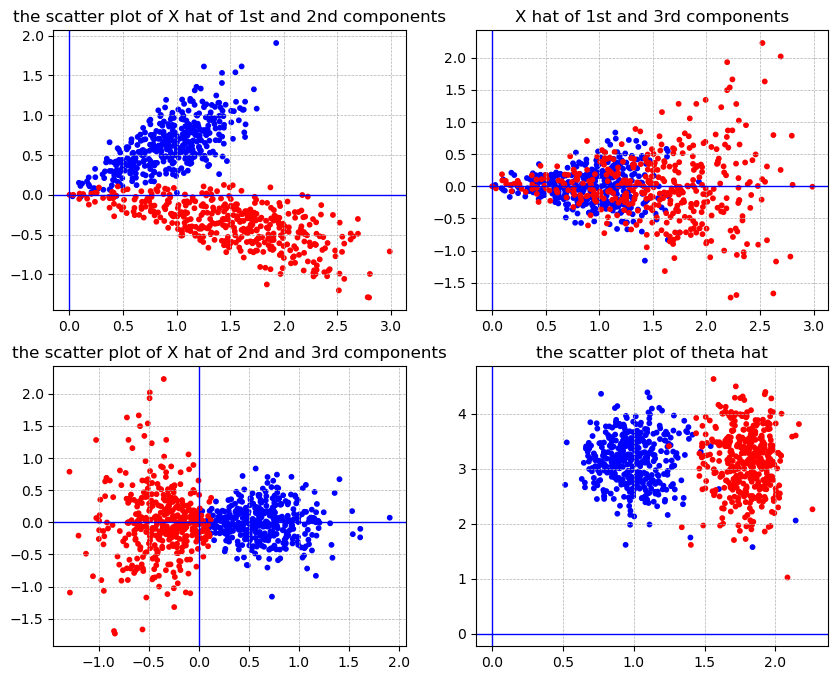

In [17]:
fig, axes = plt.subplots(2, 2, figsize=(10, 8))


U, S, Vh = svd(A, 3)
S = np.diag(S)
X = U@S
theta = spherical_transform(X)
theta = fill_nan_with_mean(theta)
color = ['blue', 'red', 'green', 'orange', 'black', 'purple']
colors = [color[l] for l in labels]

axes[0,0].scatter(X[:,0], X[:,1],s=10, c=colors)
axes[0,0].axhline(0, color='blue', linewidth=1) 
axes[0,0].axvline(0, color='blue', linewidth=1)
axes[0,0].set_title('the scatter plot of X hat of 1st and 2nd components')
axes[0,0].grid(True, linestyle='--', linewidth=0.5)

axes[0,1].scatter(X[:,0], X[:,2],s=10, c=colors)
axes[0,1].axhline(0, color='blue', linewidth=1) 
axes[0,1].axvline(0, color='blue', linewidth=1)
axes[0,1].set_title('X hat of 1st and 3rd components')
axes[0,1].grid(True, linestyle='--', linewidth=0.5)

axes[1,0].scatter(X[:,1], X[:,2],s=10, c=colors)
axes[1,0].axhline(0, color='blue', linewidth=1) 
axes[1,0].axvline(0, color='blue', linewidth=1)
axes[1,0].set_title('the scatter plot of X hat of 2nd and 3rd components')
axes[1,0].grid(True, linestyle='--', linewidth=0.5)

axes[1,1].scatter(theta[:,0], theta[:,1],s=10, c=colors)
axes[1,1].axhline(0, color='blue', linewidth=1) 
axes[1,1].axvline(0, color='blue', linewidth=1)
axes[1,1].set_title('the scatter plot of theta hat')
axes[1,1].grid(True, linestyle='--', linewidth=0.5)

sdsd
sdsd
sdsd
sdsd
sdsd
[[0.54715287 0.54721089 0.70187601 0.69623982 0.58608681]
 [0.54721089 0.54244572 0.56599134 0.6715389  0.66732433]
 [0.70187601 0.56599134 0.59030512 0.75619238 0.65495642]
 [0.69623982 0.6715389  0.75619238 0.65098113 0.5989818 ]
 [0.58608681 0.66732433 0.65495642 0.5989818  0.50372608]]
1.0
0.9996599655804982


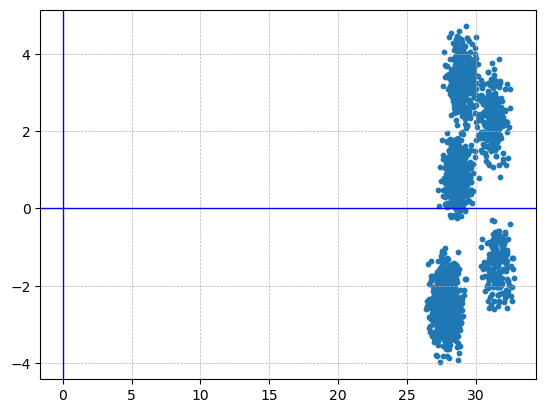

In [273]:
n_B = generate_normal_B(5,0.7,0.1)
print(n_B)
party_size =[500,400,300,200,900]
simul_graph = net.stochastic_block_model(party_size, n_B)
t_label = gen_true_label([500,400,300,200,900])
A = net.to_numpy_matrix(simul_graph)
U, S, Vh = svd(A, 5) # not sure 600 is a good number 
S = np.diag(S)
X = U@S
plt.scatter(X[:,0], X[:,1],s=10)
plt.axhline(0, color='blue', linewidth=1) 
plt.axvline(0, color='blue', linewidth=1)
plt.grid(True, linestyle='--', linewidth=0.5)

result = SC(n_clusters=5, n_components=5,random_state=100).fit_predict(X)
print(rand_score(t_label,result))
result = Gauss(n_components=5,random_state=100).fit_predict(X)
print(rand_score(t_label,result))

In [15]:
li = [n for n in range(5,53,2)]
li_n = []
for n in li:
    li_n.append([50 for n in range(n)])
B_list = [generate_normal_B(n,3,2) for n in li]
print(B_list)

[array([[0.31958522, 0.37547971, 0.45402101, 0.69983303, 0.37605667],
       [0.37547971, 0.72787503, 0.44211762, 0.71179241, 0.60150466],
       [0.45402101, 0.44211762, 0.69486933, 0.61454265, 0.49345906],
       [0.69983303, 0.71179241, 0.61454265, 0.84275699, 0.7658312 ],
       [0.37605667, 0.60150466, 0.49345906, 0.7658312 , 0.9011078 ]]), array([[0.43806493, 0.91330469, 0.8606407 , 0.51643784, 0.51282154,
        0.75405577, 0.90814797],
       [0.91330469, 0.75477935, 0.77150909, 0.52431397, 0.84921982,
        0.68991755, 0.66159355],
       [0.8606407 , 0.77150909, 0.59015351, 0.8585353 , 0.59014323,
        0.47060325, 0.51669583],
       [0.51643784, 0.52431397, 0.8585353 , 0.48756606, 0.63106084,
        0.83574413, 0.82600616],
       [0.51282154, 0.84921982, 0.59014323, 0.63106084, 0.27770092,
        0.26232372, 0.46718968],
       [0.75405577, 0.68991755, 0.47060325, 0.83574413, 0.26232372,
        0.875193  , 0.64189885],
       [0.90814797, 0.66159355, 0.51669583, 0.

In [16]:
score_1 = []
score_2 = []
for n in range(len(li)):
    simul_graph = net.stochastic_block_model(li_n[n], B_list[n])
    t_label = gen_true_label(li_n[n])
    A = net.to_numpy_matrix(simul_graph)
    U, S, Vh = svd(A, li[n]) # not sure 600 is a good number 
    S = np.diag(S)
    X = U@S
    result = SC(n_clusters=li[n], n_components=li[n],random_state=100).fit_predict(X)
    score_1.append(rand_score(t_label,result))
    result = Gauss(n_components=li[n],random_state=100).fit_predict(X)
    score_2.append(rand_score(t_label,result))

<function matplotlib.pyplot.show(close=None, block=None)>

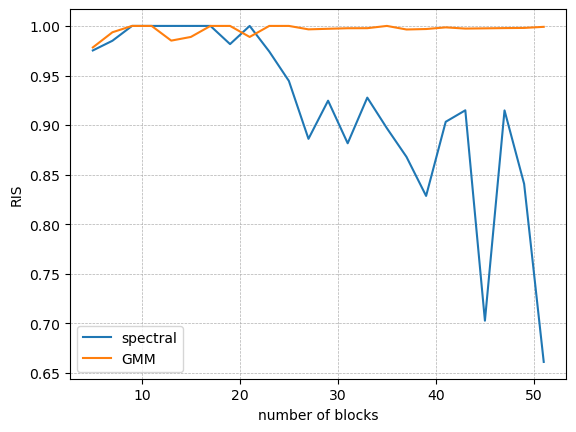

In [18]:
plt.grid(True, linestyle='--', linewidth=0.5)
plt.plot(li,score_1, label='spectral')
plt.plot(li,score_2, label='GMM')
plt.xlabel('number of blocks')
plt.ylabel('RIS')
plt.legend()
plt.show

In [9]:
clusters = 10 
li_n = []
for n in range(50,501,10):
    li_n.append([n for i in range(10)])
B_list = generate_normal_B(10,3, 2)
li_n

[[50, 50, 50, 50, 50, 50, 50, 50, 50, 50],
 [60, 60, 60, 60, 60, 60, 60, 60, 60, 60],
 [70, 70, 70, 70, 70, 70, 70, 70, 70, 70],
 [80, 80, 80, 80, 80, 80, 80, 80, 80, 80],
 [90, 90, 90, 90, 90, 90, 90, 90, 90, 90],
 [100, 100, 100, 100, 100, 100, 100, 100, 100, 100],
 [110, 110, 110, 110, 110, 110, 110, 110, 110, 110],
 [120, 120, 120, 120, 120, 120, 120, 120, 120, 120],
 [130, 130, 130, 130, 130, 130, 130, 130, 130, 130],
 [140, 140, 140, 140, 140, 140, 140, 140, 140, 140],
 [150, 150, 150, 150, 150, 150, 150, 150, 150, 150],
 [160, 160, 160, 160, 160, 160, 160, 160, 160, 160],
 [170, 170, 170, 170, 170, 170, 170, 170, 170, 170],
 [180, 180, 180, 180, 180, 180, 180, 180, 180, 180],
 [190, 190, 190, 190, 190, 190, 190, 190, 190, 190],
 [200, 200, 200, 200, 200, 200, 200, 200, 200, 200],
 [210, 210, 210, 210, 210, 210, 210, 210, 210, 210],
 [220, 220, 220, 220, 220, 220, 220, 220, 220, 220],
 [230, 230, 230, 230, 230, 230, 230, 230, 230, 230],
 [240, 240, 240, 240, 240, 240, 240, 240, 2

In [10]:
node_li = [n[0] for n in li_n]

In [11]:
score_3 = []
score_4 = []
for n in range(len(li_n)):
    simul_graph = net.stochastic_block_model(li_n[n], B_list)
    t_label = gen_true_label(li_n[n])
    A = net.to_numpy_matrix(simul_graph)
    U, S, Vh = svd(A, 10)
    S = np.diag(S)
    X = U@S
    result = SC(n_clusters=10, n_components=10,random_state=100).fit_predict(X)
    score_3.append(rand_score(t_label,result))
    result = Gauss(n_components=10,random_state=100).fit_predict(X)
    score_4.append(rand_score(t_label,result))

<function matplotlib.pyplot.show(close=None, block=None)>

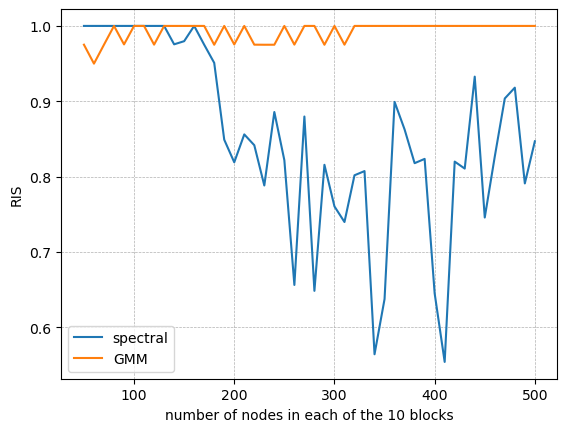

In [12]:
plt.grid(True, linestyle='--', linewidth=0.5)
plt.plot(node_li,score_3, label='spectral')
plt.plot(node_li,score_4, label='GMM')
plt.xlabel('number of nodes in each of the 10 blocks')
plt.ylabel('RIS')
plt.legend()
plt.show

## Degree corrected


In [53]:
B = generate_normal_B(2,3,2)
B
beta = np.random.beta(2,1, (1,800))[0] #500 nodes
print(len(beta))
labels = gen_true_label([400 for n in range(2)])

800


In [54]:
print(True in (beta >=1))
print(True in (beta < 0))

False
False


In [9]:
def get_proba(B, beta, node_labels):
    out = []
    for i in range(len(beta)):
        phi_1 = beta[i]
        minor = [0 for n in range(i+1)]
        for j in range(i+1,len(beta)):
            phi_2 = beta[j]
            Bij = B[node_labels[i]][node_labels[j]]
            minor.append(phi_1*phi_2*Bij)
        out.append(minor)
    out = np.array(out)
    for i in range(len(beta)):
        for j in range(i,len(beta)):
            out[j][i] = out[i][j]
    return out

In [56]:
full = get_proba(B, beta, labels)
full.shape

(800, 800)

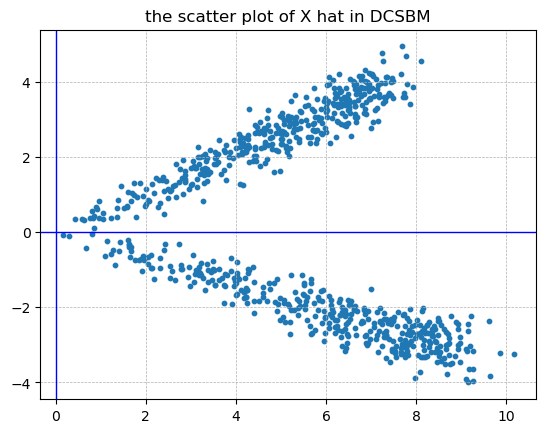

In [59]:
beta = np.random.beta(2,1, (1,800))[0] #500 nodes
labels = gen_true_label([400 for n in range(2)])
full = get_proba(B, beta, labels)
full.shape
dummy_label = [1 for n in range(len(beta))]
simul_graph = net.stochastic_block_model(dummy_label, full)
t_label = labels
A = net.to_numpy_matrix(simul_graph)
U, S, Vh = svd(A, 2)
S = np.diag(S)
X = U@S
plt.scatter(X[:,0], X[:,1],s=10)
plt.axhline(0, color='blue', linewidth=1) 
plt.axvline(0, color='blue', linewidth=1)
plt.title('the scatter plot of X hat in DCSBM')
plt.grid(True, linestyle='--', linewidth=0.5)


In [34]:
clusters = [n for n in range(2,20)]
node_li = []
for n in clusters:
    node_li.append([100 for i in range(n)])
score_6 = []
score_7 = []
for n in range(len(clusters)):
    B = generate_normal_B(clusters[n],3, 2)
    beta = np.random.beta(clusters[n],1, (1,100*clusters[n]))[0] #500 nodes
    labels = gen_true_label([100 for n in range(clusters[n])])
    full = get_proba(B, beta, labels)
    dummy = [1 for n in range(len(beta))]
    simul_graph = net.stochastic_block_model(dummy, full)
    A = net.to_numpy_matrix(simul_graph)
    U, S, Vh = svd(A, clusters[n])
    S = np.diag(S)
    X = U@S
    result = SC(n_clusters=clusters[n], n_components=clusters[n],random_state=100).fit_predict(X)
    score_6.append(rand_score(labels,result))
    result = Gauss(n_components=clusters[n],random_state=100).fit_predict(X)
    score_7.append(rand_score(labels,result))

In [36]:
clusters

[2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19]

<function matplotlib.pyplot.show(close=None, block=None)>

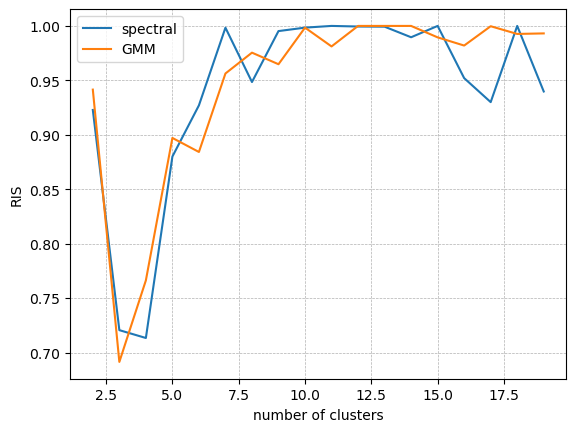

In [35]:
plt.grid(True, linestyle='--', linewidth=0.5)
plt.plot(clusters,score_6, label='spectral')
plt.plot(clusters,score_7, label='GMM')
plt.xlabel('number of clusters')
plt.ylabel('RIS')
plt.legend()
plt.show

In [64]:
node_li = []
for n in range(1,29,2):
    node_li.append([n*50, n*50])
score_8 = []
score_9 = []
B = generate_normal_B(2,1, 1)
for n in range(len(node_li)):
    beta = np.random.beta(2,1, (1,2*node_li[n][0]))[0] #500 nodes
    labels = gen_true_label(node_li[n])
    full = get_proba(B, beta, labels)
    dummy = [1 for n in range(len(beta))]
    simul_graph = net.stochastic_block_model(dummy, full)
    A = net.to_numpy_matrix(simul_graph)
    U, S, Vh = svd(A, 2)
    S = np.diag(S)
    X = U@S
    result = SC(n_clusters=2, n_components=2,random_state=100).fit_predict(X)
    score_8.append(rand_score(labels,result))
    result = Gauss(n_components=2,random_state=100).fit_predict(X)
    score_9.append(rand_score(labels,result))

<function matplotlib.pyplot.show(close=None, block=None)>

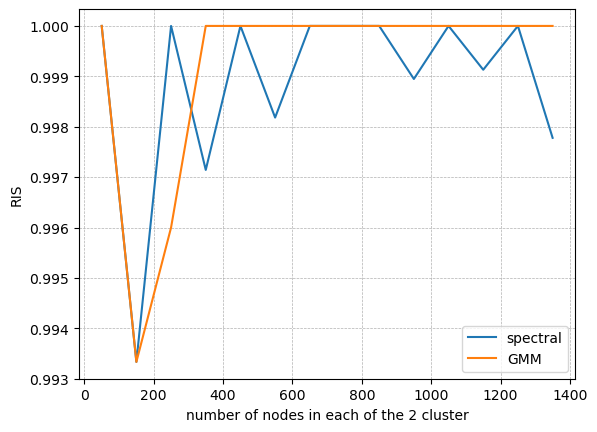

In [65]:
plt.grid(True, linestyle='--', linewidth=0.5)
nodes = [n[0] for n in node_li]
plt.plot(nodes ,score_8, label='spectral')
plt.plot(nodes ,score_9, label='GMM')
plt.xlabel('number of nodes in each of the 2 cluster')
plt.ylabel('RIS')
plt.legend()
plt.show

In [37]:
node_li = [] # without spherical but with not random B
for n in range(10,39,2):
    node_li.append([n*50, n*50])
score_10 = []
score_11 = []
B = np.array([[0.1, 0.05],[0.05, 0.15]])
for n in range(len(node_li)):
    beta = np.random.beta(2,1, (1,2*node_li[n][0]))[0] #500 nodes
    labels = gen_true_label(node_li[n])
    full = get_proba(B, beta, labels)
    dummy = [1 for n in range(len(beta))]
    simul_graph = net.stochastic_block_model(dummy, full)
    A = net.to_numpy_matrix(simul_graph)
    U, S, Vh = svd(A, 2)
    S = np.diag(S)
    X = U@S
    result = SC(n_clusters=2, n_components=2,random_state=100).fit_predict(X)
    score_10.append(rand_score(labels,result))
    result = Gauss(n_components=2,random_state=100).fit_predict(X)
    score_11.append(rand_score(labels,result))

<function matplotlib.pyplot.show(close=None, block=None)>

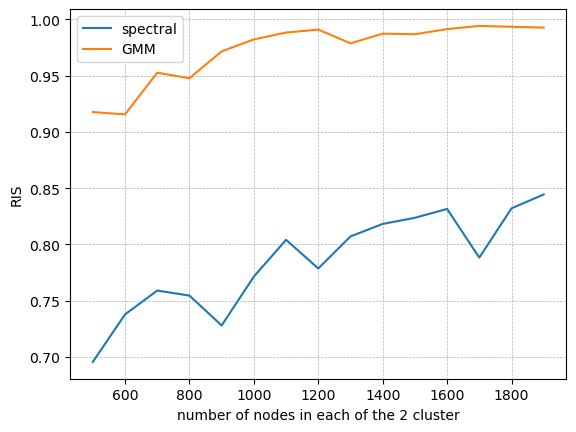

In [38]:
node_li = [] # without spherical 
for n in range(10,39,2):
    node_li.append([n*50, n*50])
plt.grid(True, linestyle='--', linewidth=0.5)
nodes = [n[0] for n in node_li]
plt.plot(nodes ,score_10, label='spectral')
plt.plot(nodes ,score_11, label='GMM')
plt.xlabel('number of nodes in each of the 2 cluster')
plt.ylabel('RIS')
plt.legend()
plt.show

In [12]:
def fill_nan_with_mean(vector):
    # Calculate the mean value excluding NaNs
    mean_value = np.nanmean(vector)

    # Iterate through the vector and replace NaNs with the mean value
    for i in range(len(vector)):
        if True in (np.isnan(vector[i])):
            vector[i] = mean_value

    return vector

In [45]:
node_li = []
for n in range(10,39,2):
    node_li.append([n*50, n*50])
score_12 = []
score_13 = []
B = np.array([[0.1, 0.05],
            [0.05, 0.15]])
for n in range(len(node_li)):
    beta = np.random.beta(2,1, (1,2*node_li[n][0]))[0] #500 nodes
    labels = gen_true_label(node_li[n])
    full = get_proba(B, beta, labels)
    dummy = [1 for n in range(len(beta))]
    simul_graph = net.stochastic_block_model(dummy, full)
    A = net.to_numpy_matrix(simul_graph)
    U, S, Vh = svd(A, 2)
    S = np.diag(S)
    X = U@S
    theta = spherical_transform(X)# there could be nan in theta as the dividing step could give us 0
    theta = fill_nan_with_mean(theta)
    result = SC(n_clusters=2, n_components=2,random_state=100).fit_predict(theta)
    score_12.append(rand_score(labels,result))
    result = Gauss(n_components=2,random_state=100).fit_predict(theta)
    score_13.append(rand_score(labels,result))

/var/folders/nw/yrwl9yzd70s4k1gsg19m2rjw0000gn/T/ipykernel_51154/183715772.py:6: RuntimeWarning: invalid value encountered in double_scalars
  X1[i, 0] = np.arccos((X[i, 1]) / np.linalg.norm(X[i, :2]))


<function matplotlib.pyplot.show(close=None, block=None)>

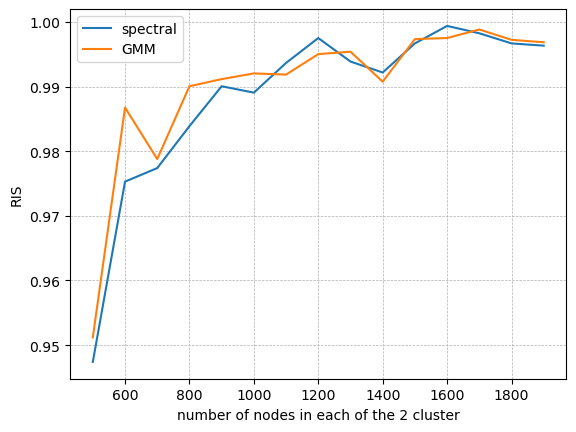

In [46]:
node_li = []
for n in range(10,39,2):
    node_li.append([n*50, n*50])
plt.grid(True, linestyle='--', linewidth=0.5)
nodes = [n[0] for n in node_li]
plt.plot(nodes ,score_12, label='spectral')
plt.plot(nodes ,score_13, label='GMM')
plt.xlabel('number of nodes in each of the 2 cluster')
plt.ylabel('RIS')
plt.legend()
plt.show

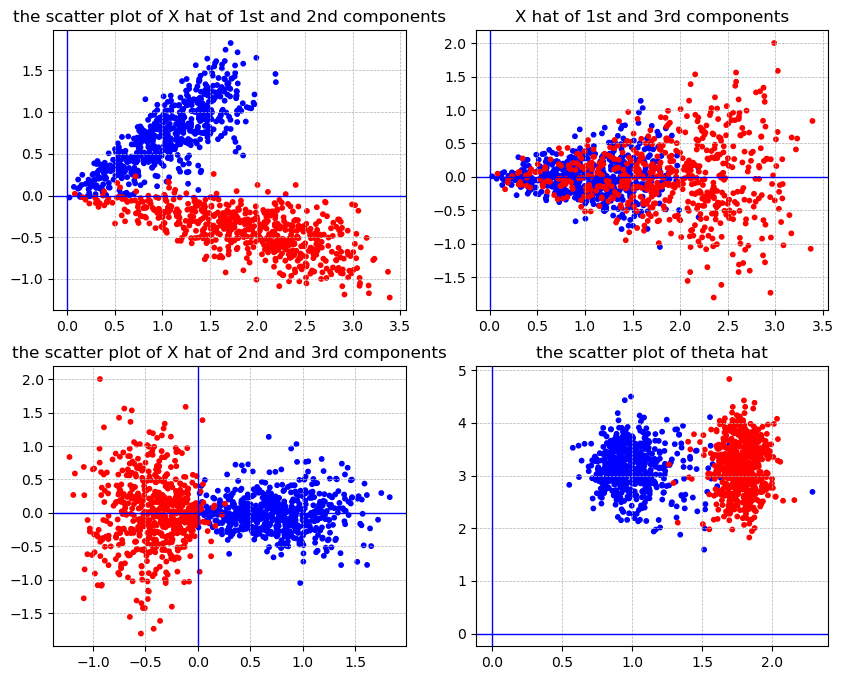

In [43]:
fig, axes = plt.subplots(2, 2, figsize=(10, 8))

B = np.array([[0.1, 0.05],
            [0.05, 0.15]])
beta = np.random.beta(2,1, (1,1200))[0] 
labels = gen_true_label([600,600])
full = get_proba(B, beta, labels)
dummy = [1 for n in range(len(beta))]
simul_graph = net.stochastic_block_model(dummy, full)
A = net.to_numpy_matrix(simul_graph)
U, S, Vh = svd(A, 3)
S = np.diag(S)
X = U@S
theta = spherical_transform(X)
theta = fill_nan_with_mean(theta)
color = ['blue', 'red', 'green', 'orange', 'black', 'purple']
colors = [color[l] for l in labels]

axes[0,0].scatter(X[:,0], X[:,1],s=10, c=colors)
axes[0,0].axhline(0, color='blue', linewidth=1) 
axes[0,0].axvline(0, color='blue', linewidth=1)
axes[0,0].set_title('the scatter plot of X hat of 1st and 2nd components')
axes[0,0].grid(True, linestyle='--', linewidth=0.5)

axes[0,1].scatter(X[:,0], X[:,2],s=10, c=colors)
axes[0,1].axhline(0, color='blue', linewidth=1) 
axes[0,1].axvline(0, color='blue', linewidth=1)
axes[0,1].set_title('X hat of 1st and 3rd components')
axes[0,1].grid(True, linestyle='--', linewidth=0.5)

axes[1,0].scatter(X[:,1], X[:,2],s=10, c=colors)
axes[1,0].axhline(0, color='blue', linewidth=1) 
axes[1,0].axvline(0, color='blue', linewidth=1)
axes[1,0].set_title('the scatter plot of X hat of 2nd and 3rd components')
axes[1,0].grid(True, linestyle='--', linewidth=0.5)

axes[1,1].scatter(theta[:,0], theta[:,1],s=10, c=colors)
axes[1,1].axhline(0, color='blue', linewidth=1) 
axes[1,1].axvline(0, color='blue', linewidth=1)
axes[1,1].set_title('the scatter plot of theta hat')
axes[1,1].grid(True, linestyle='--', linewidth=0.5)

## Gaussian behavior

In [71]:
a = np.random.normal(0.8, 0.001, (1,5))
b = np.random.normal(0.8, 0.001, (1,5))
np.concatenate((a,b))

array([[0.8010005 , 0.80000152, 0.79970937, 0.80010045, 0.80153194],
       [0.80032099, 0.80019874, 0.80066553, 0.79939141, 0.80108541]])

In [105]:
np.zeros([1,3])

array([[0., 0., 0.]])

In [100]:
def get_Gauss_B(n_cluster, mean, var_vec):
    out = []
    for n in range(n_cluster):
        mean = np.zeros([1,n_cluster])
        mean[0] = 
        line = 

    return np.array(out)

In [104]:
G_B = get_Gauss_B(5, [0.8, 0.6, 0.7, 0.9, 0.3], [0.01, 0.03, 0.05, 0.07, 0.02])
G_B

array([[0.77941943, 0.80542522, 0.79454778, 0.80677828, 0.79530722],
       [0.61649044, 0.56988155, 0.59348049, 0.6066975 , 0.65020672],
       [0.77574583, 0.78239478, 0.66184389, 0.57649596, 0.76973035],
       [1.01874711, 0.92348266, 1.05817239, 0.92576816, 0.96507085],
       [0.28113148, 0.29044822, 0.30285004, 0.26812064, 0.31713533]])

In [103]:
size = [800, 600, 700, 900, 300]
simul_graph = net.stochastic_block_model(size, G_B)

NetworkXException: 'p' must be symmetric.

In [108]:
a = [1,2,3,4]
a[0:2] = [9,9]
a

[9, 9, 3, 4]

In [222]:
def gen_latent(m, d, node_li, var_vec, mean_var, var_var):
    li = []
    index = 0
    for n in node_li:
        mean = (np.zeros([1,m]) + 1)*np.pi
        mean = mean[0]
        mean[0:d] = np.random.uniform(0,2*np.pi,size=d)
        variance = np.random.normal(mean_var, var_var,(d,d))
        variance = (variance + np.transpose(variance))/2
        var_lower = (np.zeros([m-d,m-d]) + 1)*var_vec[index]
        var = np.block([[variance, np.zeros([d,m-d])],[np.zeros([m-d,d]), var_lower]])
        print(np.random.multivariate_normal(mean,var,size=(n,)).shape)
        li.append(np.random.multivariate_normal(mean,var,size=(n,)))
        index += 1
    out = li[0]
    for a in li[1:]:
        out = np.concatenate((out,a))
        print(out.shape)
    return out

In [223]:
latent = gen_latent(10,10,[400,400,400,400,400], [1,10,20,0.3,0.4], 10, 1)

(400, 10)
(400, 10)
(400, 10)
(400, 10)
(400, 10)
(800, 10)
(1200, 10)
(1600, 10)
(2000, 10)


/var/folders/nw/yrwl9yzd70s4k1gsg19m2rjw0000gn/T/ipykernel_35508/1887136481.py:12: RuntimeWarning: covariance is not positive-semidefinite.
  print(np.random.multivariate_normal(mean,var,size=(n,)).shape)
/var/folders/nw/yrwl9yzd70s4k1gsg19m2rjw0000gn/T/ipykernel_35508/1887136481.py:13: RuntimeWarning: covariance is not positive-semidefinite.
  li.append(np.random.multivariate_normal(mean,var,size=(n,)))


In [227]:
result = Gauss(n_components=5,random_state=100).fit_predict(latent)
t_label = gen_true_label([400,400,400,400,400])
print(rand_score(t_label, result))
result = SC(n_clusters=5,n_components=5, random_state=100).fit_predict(latent)
t_label = gen_true_label([400,400,400,400,400])
print(rand_score(t_label, result))

0.988415707853927
0.5181270635317659


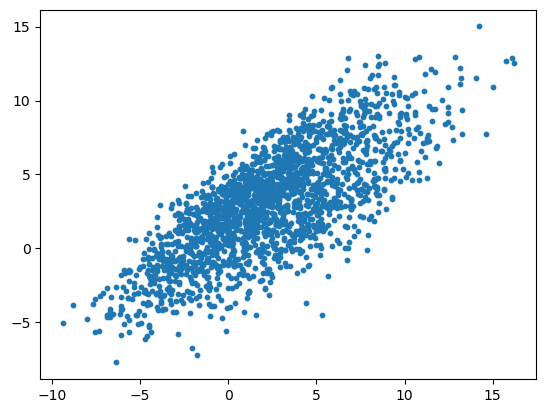

In [226]:
plt.scatter(latent[:,0], latent[:,1], s = 10)